# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [5]:
print(f'Dataframe shape: {data.shape} ({data.shape[1]} columns and {data.shape[0]} rows).')
print(f'Dataframe columns names: {data.columns.tolist()}.')
data.sample(10)

Dataframe shape: (5391, 6) (6 columns and 5391 rows).
Dataframe columns names: ['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross'].


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3104,2482,3/10/2008,Flash of Genius,"$20,000,000","$4,504,111","$4,442,377"
3885,4671,4/22/2011,POM Wonderful Presents: The Greatest Movie Eve...,"$1,800,000","$783,733","$638,476"
4995,1764,9/18/2015,Sicario,"$30,000,000","$78,571,737","$46,889,293"
2047,3547,6/20/2003,The Legend of Suriyothai,"$9,000,000","$454,255","$454,255"
113,3832,8/26/1964,Mary Poppins,"$6,000,000","$102,300,000","$102,300,000"
5268,4906,11/3/2016,Creative Control,"$1,000,000","$63,014","$63,014"
1246,1130,5/11/1999,The Bone Collector,"$48,000,000","$151,463,090","$66,488,090"
4614,3583,6/13/2014,The Rover,"$8,500,000","$3,180,252","$1,109,199"
834,2633,12/29/1995,Restoration,"$18,000,000","$4,100,000","$4,100,000"
3914,50,6/24/2011,Cars 2,"$200,000,000","$560,155,383","$191,450,875"


In [49]:
print(f"Number of rows with duplicated app data: {data.duplicated(subset=['Release_Date', 'Movie_Title']).sum()}")
print(f'Number of missing values: {data.isna().sum().sum()}')

data = data.drop_duplicates(subset=['Release_Date', 'Movie_Title'])

Number of rows with duplicated app data: 0
Number of missing values: 0


In [50]:
print("Columns datatypes:")
print(data.dtypes)

Columns datatypes:
Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [51]:
cols = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
for col in cols:
    data[col] = data[col].astype(str).str.replace('$', '').str.replace(',', '')
data[cols] = data[cols].apply(pd.to_numeric)
data.sample(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3965,2376,8/31/2011,The Debt,20000000,46604054,31177548
905,2110,9/13/1996,Maximum Risk,25000000,51702929,14102929
4674,1633,9/19/2014,The Maze Runner,34000000,348319861,102427862
1335,4320,10/29/1999,Dreaming of Joseph Lees,3250000,7680,7680
132,5029,10/5/1967,Per qualche dollaro in più,600000,4300000,4300000
1103,4280,6/11/1998,Gods and Monsters,3500000,6451628,6451628
2099,929,10/10/2003,Kill Bill: Volume 1,55000000,176469428,70098138
1300,2281,9/7/1999,Arlington Road,21500000,24419219,24419219
3533,637,12/23/2009,Alvin and the Chipmunks: The Squeakquel,70000000,443483213,219614612
4084,5382,1/13/2012,Newlyweds,9000,4584,4584


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [52]:
data.Release_Date = pd.to_datetime(data.Release_Date)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5390 non-null   int64         
 1   Release_Date           5390 non-null   datetime64[ns]
 2   Movie_Title            5390 non-null   object        
 3   USD_Production_Budget  5390 non-null   int64         
 4   USD_Worldwide_Gross    5390 non-null   int64         
 5   USD_Domestic_Gross     5390 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 294.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [54]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,390.00",5390,"5,390.00","5,390.00","5,390.00"
mean,"2,695.52",2003-09-19 08:04:21.818181888,"31,119,487.81","88,871,907.20","41,243,169.82"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.25",1999-12-02 06:00:00,"5,000,000.00","3,877,146.00","1,335,065.75"
50%,"2,695.50",2006-06-23 00:00:00,"17,000,000.00","27,460,037.00","17,196,565.00"
75%,"4,042.75",2011-11-23 00:00:00,"40,000,000.00","96,461,821.00","52,348,661.50"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.14",NaN,"40,525,356.93","168,469,037.10","66,033,082.74"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [55]:
print(f"There is  {(data.USD_Domestic_Gross == 0).sum()} movies with domestic revenue of 0 USD.")
print(f"Highest budget movies in that category are:")
(data_clean[data.USD_Domestic_Gross == 0]).nlargest(5, 'USD_Production_Budget')

There is  511 movies with domestic revenue of 0 USD.
Highest budget movies in that category are:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [56]:
print(f"There is  {(data.USD_Worldwide_Gross == 0).sum()} movies with worldwide revenue of 0 USD.")
print(f"Highest budget movies in that category are:")
(data_clean[data.USD_Worldwide_Gross == 0]).nlargest(5, 'USD_Production_Budget')

There is  356 movies with worldwide revenue of 0 USD.
Highest budget movies in that category are:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


### Filtering on Multiple Conditions

In [57]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [58]:
international_releases_q = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
international_releases_q

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [61]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
unreleased_movies = data.loc[data.Release_Date >= scrape_date]
unreleased_movies

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [62]:
data_clean = data.drop(unreleased_movies.index)
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [64]:
movies_negative_revenue = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
p_movies_neg_rev = len(movies_negative_revenue)/len(data_clean) * 100
print(f"Percentage of films that are losing money: {p_movies_neg_rev}%")

Percentage of films that are losing money: 37.265465353891884%


# Seaborn for Data Viz: Bubble Charts

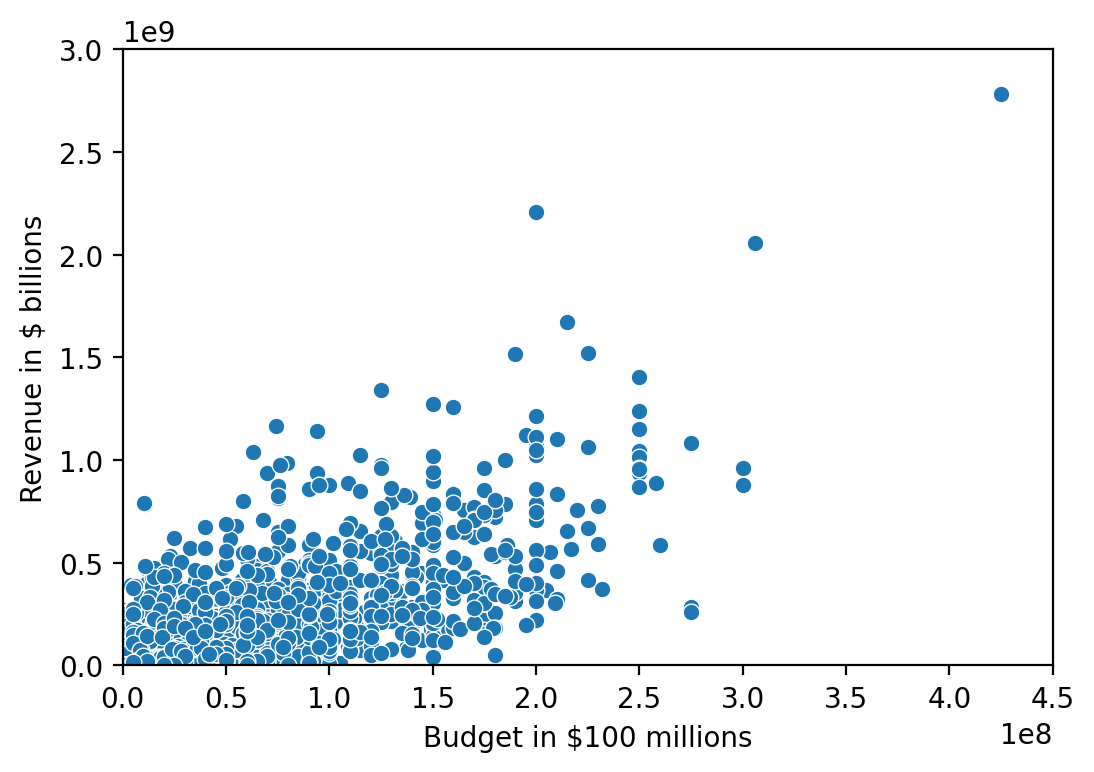

In [79]:
plt.figure(figsize=(6,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



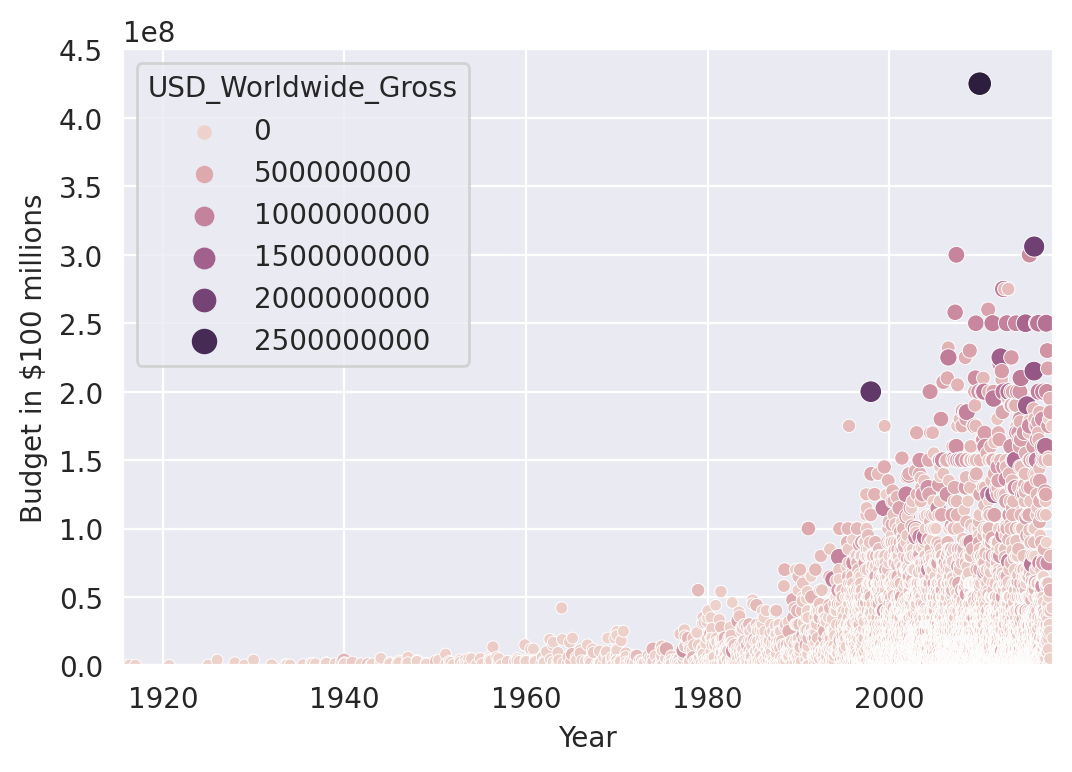

In [85]:
plt.figure(figsize=(6,4), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,
                         x='Release_Date', 
                         y='USD_Production_Budget',
                         hue='USD_Worldwide_Gross', # colour
                         size='USD_Worldwide_Gross',) # dot size
ax.set(ylim=(0, 450000000),
       xlim=([data_clean.Release_Date.min(), data_clean.Release_Date.max()]),
       ylabel='Budget in $100 millions',
       xlabel='Year')
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [86]:
dt_object = pd.DatetimeIndex(data=data_clean.Release_Date).year
dt_object

Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='Release_Date', length=5383)

In [89]:
# dt_object = dt_object - dt_object % 10   # method with modulo
decades = dt_object // 10 * 10   # method with floor division
decades

Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
       ...
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
      dtype='int32', name='Release_Date', length=5383)

In [92]:
data_clean['Decade'] = decades
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [95]:
old_films = data_clean.loc[data_clean.Decade < 1970]
new_films = data_clean.loc[data_clean.Decade >= 1970]
print(f"{len(old_films)} films were released prior to 1970.")
print(f"{len(new_films)} films were released since 1970.")
print(f"Most expensive films released prior to 1970:")
old_films.nlargest(5, 'USD_Production_Budget')

153 films were released prior to 1970.
5230 films were released since 1970.
Most expensive films released prior to 1970:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


# Seaborn Regression Plots

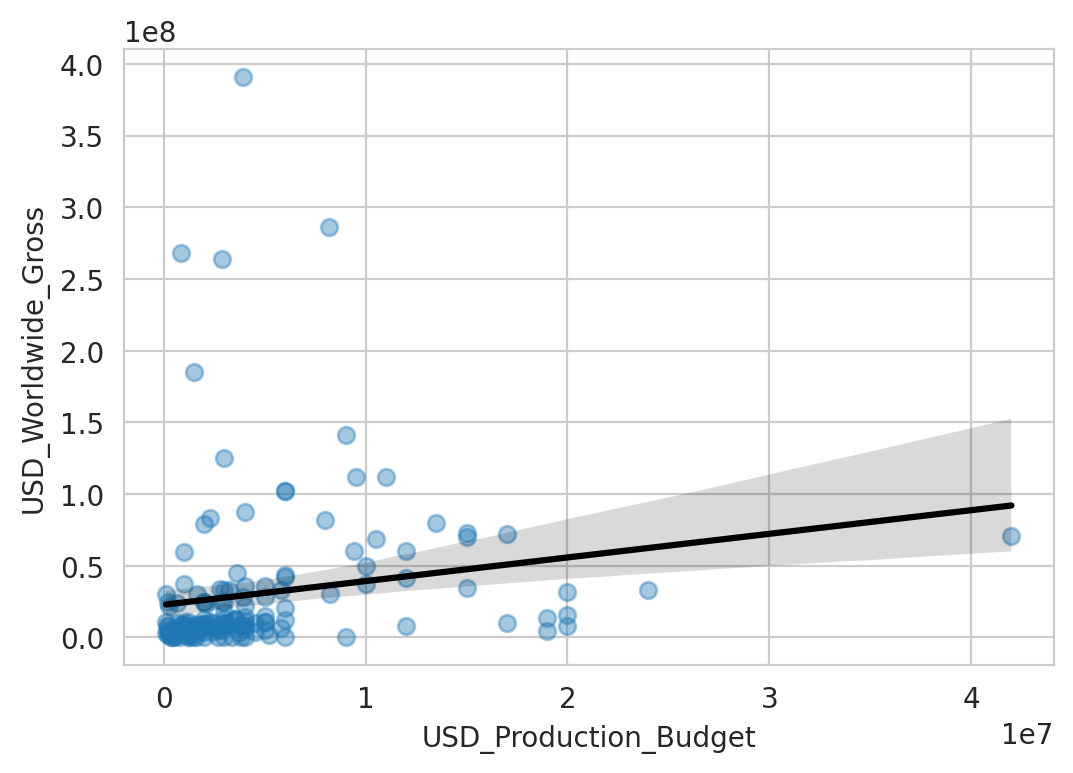

In [99]:
plt.figure(figsize=(6,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

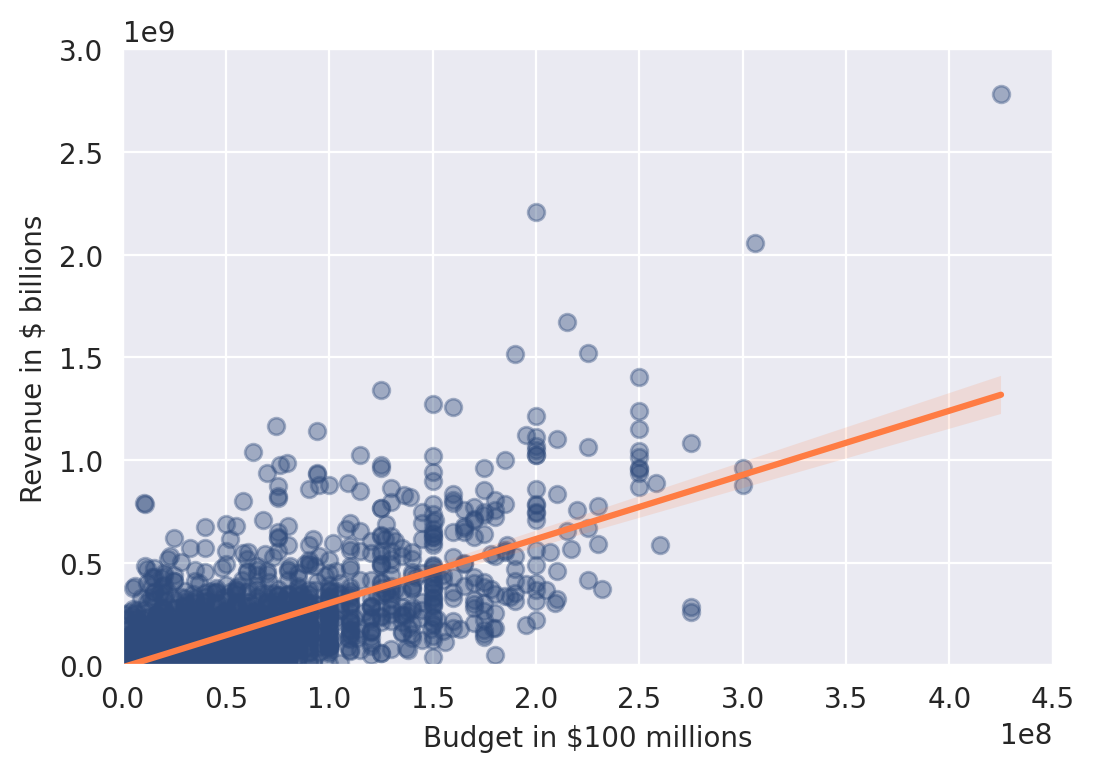

In [105]:
plt.figure(figsize=(6,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films, 
                   x='USD_Production_Budget', 
                   y='USD_Worldwide_Gross',
                   scatter_kws = {'alpha': 0.3, 'color': '#2f4b7c'},
                   line_kws = {'color': '#ff7c43'})
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [116]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

# Find the best-fit line
regression.fit(X, y)

print(f"Intercept: {regression.intercept_}")
print(f"Slope coefficient: {regression.coef_}")
print(f"R-squared: {regression.score(X, y)}")

Intercept: [-8653311.20858924]
Slope coefficient: [[3.12262611]]
R-squared: 0.5576797626619335


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [117]:
regression_old = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X_old = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y_old = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 

# Find the best-fit line
regression_old.fit(X_old, y_old)

print(f"Intercept: {regression_old.intercept_}")
print(f"Slope coefficient: {regression_old.coef_}")
print(f"R-squared: {regression_old.score(X_old, y_old)}")

Intercept: [22821538.63508038]
Slope coefficient: [[1.64771314]]
R-squared: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [125]:
budget = 350000000
predicted_rev = regression.intercept_[0] + regression.coef_[0,0] * budget
predicted_rev = round(predicted_rev, -6)
print(f"Predicted revenue for a movie with a budget of $350 million: ${predicted_rev}")

Predicted revenue for a movie with a budget of $350 million: $1084000000.0
